<a href="https://colab.research.google.com/github/rohankavari/DeepLearning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/dataset/LSTM

/content/drive/MyDrive/dataset/LSTM


In [ ]:
!pwd

/content/drive/MyDrive/dataset/LSTM


In [ ]:
!wget https://www.gutenberg.org/cache/epub/1497/pg1497.txt

--2022-01-12 05:52:44--  https://www.gutenberg.org/cache/epub/1497/pg1497.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1243940 (1.2M) [text/plain]
Saving to: ‘pg1497.txt’

pg1497.txt          100%[===================>]   1.19M  --.-KB/s    in 0.1s    

2022-01-12 05:52:44 (11.5 MB/s) - ‘pg1497.txt’ saved [1243940/1243940]



Loading, cleaning the text

We transformed the data such that each seq has 51 words, and the next seq leaves the first word and takes the next 51 words.

The 50 words are input, 1 is output.

In [ ]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [ ]:

# load document
in_filename = 'republic_clean.txt'
doc = load_doc(in_filename)
print(doc[:200])
import string

# turn a doc into clean tokens
def clean_doc(doc):
	# replace '--' with a space ' '
	doc = doc.replace('--', ' ')
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', string.punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# make lower case
	tokens = [word.lower() for word in tokens]
	return tokens
# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
	# select sequence of tokens
	seq = tokens[i-length:i]
	# convert into a line
	line = ' '.join(seq)
	# store
	sequences.append(line)
print('Total Sequences: %d' % len(sequences))
# save tokens to file, one dialog per line
def save_doc(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()
# save sequences to file
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)

In [3]:
%cd /content/drive/MyDrive/dataset/LSTM

/content/drive/MyDrive/dataset/LSTM


In [ ]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [ ]:
from numpy import array
from pickle import dump
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [ ]:
# load
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
lines=lines[:100000]

In [ ]:
len(lines)

100000

In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

In [ ]:

sequences = tokenizer.texts_to_sequences(lines)
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7736


In [ ]:
# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]


In [ ]:
y.shape

(100000, 7736)

In [ ]:

# define model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            386800    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7736)              781336    
                                                                 
Total params: 1,319,036
Trainable params: 1,319,036
Non-trainable params: 0
_________________________________________________________________
None


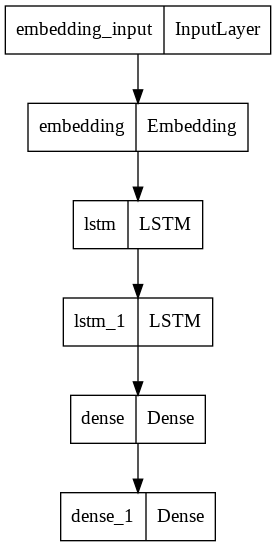

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

FITTING THE MODEL

In [ ]:
# fit model
model.fit(X, y, batch_size=300, epochs=100)

Epoch 1/100
334/334 [==============================] - 20s 47ms/step - loss: 6.5001 - accuracy: 0.0785
Epoch 2/100
334/334 [==============================] - 16s 47ms/step - loss: 6.0320 - accuracy: 0.1111
Epoch 3/100
334/334 [==============================] - 16s 47ms/step - loss: 5.7860 - accuracy: 0.1276
Epoch 4/100
334/334 [==============================] - 16s 47ms/step - loss: 5.6410 - accuracy: 0.1400
Epoch 5/100
334/334 [==============================] - 16s 47ms/step - loss: 5.5233 - accuracy: 0.1535
Epoch 6/100
334/334 [==============================] - 16s 47ms/step - loss: 5.4312 - accuracy: 0.1615
Epoch 7/100
334/334 [==============================] - 16s 47ms/step - loss: 5.3495 - accuracy: 0.1665
Epoch 8/100
334/334 [==============================] - 16s 47ms/step - loss: 5.2693 - accuracy: 0.1717
Epoch 9/100
334/334 [==============================] - 16s 47ms/step - loss: 5.1958 - accuracy: 0.1768
Epoch 10/100
334/334 [==============================] - 16s 47ms/step - l

In [ ]:
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [6]:
import numpy as np


In [9]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
	result = list()
	in_text = seed_text
	# generate a fixed number of words
	for _ in range(n_words):
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		# truncate sequences to a fixed length
		encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
		# predict probabilities for each word
		# yhat = model.predict_classes(encoded, verbose=0)
		yhat = np.argmax(model.predict(encoded), axis=-1)
	 
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text += ' ' + out_word
		result.append(out_word)
	return ' '.join(result)

# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

# load the model
model = load_model('model.h5')

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 100)
print(generated)

aside and veiled her face not liking to stir the question which has now arisen i perfectly remember he said yes my friend i said and i then shrank from hazarding the bold word but now let me dare to the perfect guardian must be a philosopher yes he said let

us proceed to the gods and who speaks of the other platonists or the state which is puzzled by the confused intimations of sense and some portions of a middle point judging to a sculptor and is not the first lot believes that there is no longer a brave and the perception of tyranny springs of athens is borrowed from the pilgrimages of the soul and the carpenter and sun the number of the state the second is that in the phaedrus and the stoical instrument of the soul and the number of the soul and the second is the


aside and veiled her face not liking to stir the question which has now arisen i perfectly remember he said yes my friend i said and i then shrank from hazarding the bold word but now let me dare to the perfect guardian must be a philosopher yes he said let

us proceed to the gods and who speaks of the other platonists or the state which is puzzled by the confused intimations of sense and some portions of a middle point judging to a sculptor and is not the first lot believes that there is no longer a brave and the perception of tyranny springs of athens is borrowed from the pilgrimages of the soul and the carpenter and sun the number of the state the second is that in the phaedrus and the stoical instrument of the soul and the number of the soul and the second is the